In [1]:
import requests
from bs4 import BeautifulSoup


def post2snap(post_url):
    res = requests.get(post_url)
    soup = BeautifulSoup(res.text)
    snap_url = soup.find('div', id="image_wrap")\
        .find('img')['src']
    return snap_url

In [2]:
json_file = os.path.join(
    os.environ['DATASET_ROOT'],
    'tiny/labels/modanet_snaps.json'
)
df = pd.read_json(json_file)
it = df.iterrows()

(-0.5, 399.5, 599.5, -0.5)

NameError: name 'coco' is not defined

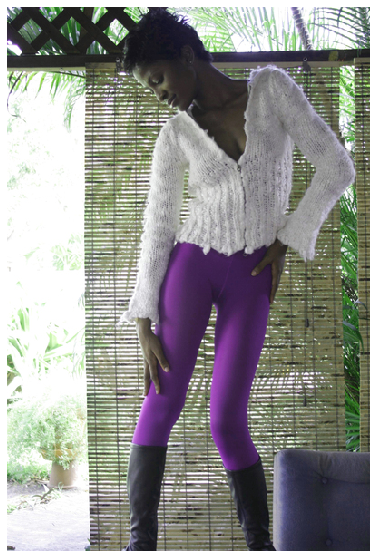

In [4]:
from PIL import Image
from io import BytesIO

i, row = next(it)
post_url = row['post_url']
img_id = row['image_id']

r = requests.get(post2snap(post_url))
I = Image.open(BytesIO(r.content))

plt.imshow(I)
plt.axis('off')

annIds = coco.getAnnIds(imgIds=img_id, catIds=all_ctg_ids, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [5]:
cats = coco.loadCats(coco.getCatIds())
all_ctgs = [cat['name'] for cat in cats]
all_ctgs

all_ctg_ids = coco.getCatIds(catNms=all_ctgs)
all_ctg_ids

NameError: name 'coco' is not defined

In [6]:
df_ctg = pd.Series(all_ctgs).reset_index()
df_ctg.columns = ['category_id', 'category']

# save
#df_ctg.to_csv('./labels/categories.tsv', sep='\t', index=False)

NameError: name 'all_ctgs' is not defined

In [7]:
# for chainer
# label
img = coco.loadImgs(img_id)[0]
h, w = img['height'], img['width']

label = np.zeros((h,w)).astype(np.int32)
catids = list()
for ann in anns:
    catid = ann['category_id']
    catids.append(catid)
    cat = coco.loadCats(ids=[ann['category_id']])[0]['name']
    catid, cat
    
    label += np.int32(coco.annToMask(ann)) * ann['category_id']
    
label[~(np.isin(label, catids))] = 0
label = label - 1
label.shape
label.min(), label.max()

# image
img = np.array(Image.open(img_file).convert('RGB'))\
    .transpose(2, 0, 1)

# show
from chainercv.visualizations import vis_semantic_segmentation

ax, lenged_handles = vis_semantic_segmentation(
                        img, label,
                        label_names=all_ctgs,
                        ignore_label_color=(255,255,255),
                        alpha=0.5,
                        all_label_names_in_legend=True)
ax.legend(handles=lenged_handles,
          bbox_to_anchor=(1,1), loc=2)

NameError: name 'coco' is not defined